# Wrangle & Analyze Data

## By Samarth Agrawal

In [1]:
import numpy as np
import pandas as pd
import json
import os
import requests
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Table of Contents


1. Gather Data
1. Assessment
1. Cleaning
1. Save to CSV
1. Analysis

## 1. Gather Data

#### Dataset Overview
Dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

##### 1) From CSV File

Twitter archive was provided to us in a csv file. we will use that dataset for our analysis

In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


##### 2) File hosted on server

Another file is provided to us that contains output of an image classifier that predicted the breed of a dog from the tweet image

In [14]:
file_name = 'image-predictions.tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(file_name, mode='wb') as file:
    file.write(response.content)

In [5]:
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

##### 3) From Twitter API

Tweeter archive data that was provided in a csv file was a very basic data. In order to enrich that data with more information we will use twitter api to get retweet_count and favorite_count

In [44]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = None
consumer_secret = None
access_token = None
access_secret = None

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [21]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive['tweet_id'].values
len(tweet_ids)

2356

In [66]:
# Let's look at a sample data for 1 tweet and understand the JSON data structure
tweet_id = '848213670039564288'
tweet = api.get_status(tweet_id, tweet_mode = 'extended')
print (tweet)

with open('json_test.txt', mode = 'w') as json_file:
    json.dump(tweet._json, json_file)

Status(_api=<tweepy.api.API object at 0x0000000008F3CA58>, _json={'created_at': 'Sat Apr 01 16:41:12 +0000 2017', 'id': 848213670039564288, 'id_str': '848213670039564288', 'full_text': 'Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet', 'truncated': False, 'display_text_range': [0, 135], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 848212111729840128, 'in_reply_to_status_id_str': '848212111729840128', 'in_reply_to_user_id': 4196983835, 'in_reply_to_user_id_str': '4196983835', 'in_reply_to_screen_name': 'dog_rates', 'user': {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partne

In [85]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
success_dict = {}
fails_dict = {}
count = 0
start = timer()
file_name = 'tweets_json.txt'
with open(file_name, mode = 'w') as outfile:
    for tweet_id in tweet_ids:
        count = count+1
        success_dict[tweet_id] = 'success'
        #print (count, ":", tweet_id)
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            #print ('success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print ('fail')
            fails_dict[tweet_id] =e
            pass

end = timer()
print (end - start)
#print (fails_dict)

2700.3078712866263
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 844704788403113984: TweepError([{'code':

In [86]:
print (len(success_dict))
print (len(fails_dict))

2356
23


In [6]:
# Create a dataframe by loading tweet json text file data
df_list = []
with open('tweets_json.txt') as file:
    for tweet in file : 
        tweet_df = {}
        json_data = json.loads(tweet)
        #print (json_data)
        #print (json_data['id'])
        #print (json_data['retweet_count'])
        #print (json_data['favorite_count'])
        tweet_df['tweet_id'] = json_data['id']
        tweet_df['retweet_count'] = json_data['retweet_count']
        tweet_df['favorite_count'] = json_data['favorite_count']
        df_list.append(tweet_df)
        #break
#print (df_list)
tweet_df = pd.DataFrame(df_list)
print (tweet_df.shape)
tweet_df.head(5)

(2333, 3)


,favorite_count,retweet_count,tweet_id
0,37357,8034,892420643555336193
1,32109,5963,892177421306343426
2,24214,3945,891815181378084864
3,40652,8186,891689557279858688
4,38875,8876,891327558926688256


## 2. Assessment 

### Following issues were identified. We will go through each one of them as we inspect each dataset

#### Quality

##### `twitter_archive` table
1. Some rows represent replies and not tweets. 78 records 
1. Some rows represent retweets and not tweets. 181 records 
1. Tweet id is loaded as `int` type. Since this is an id variable we can make it `str` type
1. Missing values in Dog Stages - Doggo, pupper, etc is recorded as None string instead of pandas standard NaN
1. Wrong datatype : variable timestamp got stored as object instead of date
1. If rating contained decimals it's not parsed correctly Ex, 9.75/10, 11.26/10
1. It was mentioned that Rating Denominator has to be 10. But it was found in some records that the value of rating_denominator was not 10
1. In one of the tweet a reference to time 24/7 was made but it was parsed as rating in the dataset
1. There are several columns that are not needed for analysis: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'
1. Name is not parsed correct. Name of `a`, `an`, `my` etc because the way some people tweet is `This is a`

##### `image_pred` table
1. Tweet id is loaded as int type. Since this is an id variable we can make it str type
1. Missing 281 records (2075 instead of 2356)
1. There are several columns that are not needed for analysis : 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

##### `tweet_df` table
1. Tweet id is loaded as int type. Since this is an id variable we can make it str type
1. Missing 23 records (2333 instead of 2356)

#### Tidiness
1. Dog Stages should not be in separate columns
1. Retweet count and favorite count should be in same dataframe as twitter_archive

#### Assessment of Twitter_archive dataset

In [3]:
twitter_archive.shape

(2356, 17)

In [5]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


* Missing values in Dog Stages - Doggo, pupper, etc is recorded as None string instead of pandas standard NaN
* There should not be separate columns for doggo, floofer.. etc. Instead there should be only one column `dog_Type` and doggo floofer, pupper etc should be the value of that column

#### Let's use info function to get more details about the dataset

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* Some rows represent replies and not tweets. 78 records
* Some rows represent retweets and not tweets. 181 records
* Tweet id is loaded as int type. Since this is an id variable we can make it str type
* Wrong datatype : variable timestamp got stored as object instead of date

In [99]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Let's look at the distribution of `Name` column by using value_counts method

In [100]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Toby          7
an            7
Daisy         7
Buddy         7
Bailey        7
Jack          6
Jax           6
Leo           6
Rusty         6
Stanley       6
Milo          6
Oscar         6
Dave          6
Koda          6
Bella         6
Scout         6
Alfie         5
           ... 
Sonny         1
Harvey        1
Jimbo         1
Beemo         1
Ed            1
Rose          1
Link          1
Brandi        1
Asher         1
Frönq         1
Halo          1
Kloey         1
Geno          1
Beckham       1
Kobe          1
Leonard       1
Livvie        1
Sandra        1
my            1
Timmy         1
Chadrick      1
Kara          1
Malikai       1
Nigel         1
Sprout        1
Rupert        1
Major         1
Lambeau       1
Remus         1
Clyde         1
Name: name, Length: 957,

* We see that `None` is the most common name which doesn't seem to be correct
* Also second most common name is `a` which again doesn't look appropriate

Let's look at the distribution of `rating_numerator` by using value_counts method

In [9]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

* Quite a wide range of values. Some values are very very high and we also get rating as low as 0

<b> Let's look at some of the very very high ratings

In [52]:
twitter_archive[twitter_archive['rating_numerator'] ==75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [53]:
twitter_archive['text'][340]

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [54]:
twitter_archive['text'][695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

* It looks like Ratings with decimals is not parsed correctly

<b> Let's look at the distribution of `rating_denominator` by using value_counts method

In [10]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

* It was mentioned that all the dogs are rated on the scale of 10 but we have got a few records that don't have a denominator of 10. We can clear the dataset by removing these records

In [22]:
twitter_archive[twitter_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [23]:
twitter_archive['text'][313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [24]:
twitter_archive['text'][342]

'@docmisterio account started on 11/15/15'

* We can see that these are not valid ratings so we will get rid of these records

<b> Let's check for null tweet_id in the dataset

In [105]:
twitter_archive['tweet_id'].isnull().sum()

0

<b> Let's check for duplicate tweet_id in the dataset

In [109]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [119]:
twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()].in_reply_to_status_id.duplicated().sum()

1

In [122]:
mask = twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()].in_reply_to_status_id.duplicated()
twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()][mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I found a forest Pipsy. 12/10 https://t.co/mIQ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453...,12,10,None,None,None,None,None


In [120]:
twitter_archive[twitter_archive['in_reply_to_user_id'].notnull()].in_reply_to_status_id.duplicated().sum()

1

<b> In one of the tweet reference to the time 24/7 was read as rating 

In [145]:
twitter_archive[(twitter_archive['rating_numerator'] == 24) & (twitter_archive['rating_denominator']==7)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [19]:
twitter_archive['text'][516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

#### Assessment of Image predictions dataset

In [12]:
image_pred.shape

(2075, 12)

In [129]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* Tweet id is loaded as int type. Since this is an id variable we can make it str type
* There are a lot of columns that we won't be needing for our analysis
* Missing data. Expected 2356 rows but got only 2075

In [131]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assessment of Tweets JSON dataset

In [124]:
tweet_df.shape

(2333, 3)

In [126]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
tweet_id          2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


* Tweet id is loaded as int type. Since this is an id variable we can make it str type
* Missing data. Expected 2356 but we only got 2333

In [128]:
tweet_df.describe()

,favorite_count,retweet_count,tweet_id
count,2333.000000,2333.000000,2.333000e+03
mean,7785.052722,2822.742392,7.419371e+17
std,12082.655594,4778.556655,6.820963e+16
min,0.000000,1.000000,6.660209e+17
25%,1351.000000,567.000000,6.782786e+17
50%,3389.000000,1321.000000,7.184547e+17
75%,9557.000000,3289.000000,7.986654e+17
max,161329.000000,81106.000000,8.924206e+17


### Summarizing the Assessment Findings

#### Quality

##### `twitter_archive` table
1. Some rows represent replies and not tweets. 78 records 
1. Some rows represent retweets and not tweets. 181 records 
1. Tweet id is loaded as `int` type. Since this is an id variable we can make it `str` type
1. Missing values in Dog Stages - Doggo, pupper, etc is recorded as None string instead of pandas standard NaN
1. Wrong datatype : variable timestamp got stored as object instead of date
1. If rating contained decimals it's not parsed correctly Ex, 9.75/10, 11.26/10
1. It was mentioned that Rating Denominator has to be 10. But it was found in some records that the value of rating_denominator was not 10
1. In one of the tweet a reference to time 24/7 was made but it was parsed as rating in the dataset
1. There are several columns that are not needed for analysis: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'
1. Name is not parsed correct. Name of `a`, `an`, `my` etc because the way some people tweet is `This is a`

##### `image_pred` table
1. Tweet id is loaded as int type. Since this is an id variable we can make it str type
1. Missing 281 records (2075 instead of 2356)
1. There are several columns that are not needed for analysis : 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

##### `tweet_df` table
1. Tweet id is loaded as int type. Since this is an id variable we can make it str type
1. Missing 23 records (2333 instead of 2356)

#### Tidiness
1. Dog Stages should not be in separate columns
1. Retweet count and favorite count should be in same dataframe as twitter_archive


There were multiple issues with Ratings (both Numerator and Denominator). And this is a) User provided data b) We have not got these values from a form but instead we have parsed user tweet text hence multiple issues have creeped in our dataset

There are a total of 15 cleanliness issues and 2 tidiness issues. Out of this I have decided to fix 14 Quality issues and 2 tidiness (10th quality issue of twitter_archive table is skipped)

## 3. Cleaning

#### Let's first make a separate dataset to perform our cleaning operations on

In [88]:
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_df_clean = tweet_df.copy()

### Tidiness

#### `twitter_archive_clean` Dog Stages should not be in separate columns

<b> Define: </b>
> Create a new column dog_stage and put the appropriate stage in that variable and remove the individual dog stages column

<b> Code

In [89]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [90]:
def dog_stages(row):
    '''
    if any of the doggo, floofer, pupper, puppo field is populated then that is the dog stage else None
    '''
    if row['doggo'] != 'None' :
        return 'doggo'
    elif row['floofer'] != 'None' :
        return 'floofer'
    elif row['pupper'] != 'None' :
        return 'pupper'
    elif row['puppo'] != 'None' :
        return 'puppo'

In [91]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean.apply(dog_stages, axis =1)
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


In [92]:
twitter_archive_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


<b> Test

In [30]:
# Individual dog stage columns are gone and instead we have new column dog_stages
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stages']

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stages                    380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Quality

#### 1) Some rows represent replies and not tweets. 78 records

<b> Define </b>
> In our analysis since we are only interested in analyzing original tweets and not the replies to original tweets we will delete such records

<b>  Code

In [93]:
# We want to keep all the records where `in_reply_to_status_id` is Blank
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isna()]
twitter_archive_clean.shape

(2278, 14)

<b> Test

In [33]:
twitter_archive_clean['in_reply_to_status_id'].notnull().sum()

0

#### 2) Some rows represent retweets and not tweets. 181 records

<b> Define </b>
> In our analysis since we are only interested in analyzing original tweets and not the retweets we will delete such records

<b> Code

In [42]:
twitter_archive_clean['retweeted_status_id'].isna().sum()

2097

In [94]:
# We want to keep all the records where `retweeted_status_id` is Blank
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isna()]
twitter_archive_clean.shape

(2097, 14)

<b> Test </b>

In [37]:
twitter_archive_clean['retweeted_status_id'].notnull().sum()

0

#### 3) Tweet id is loaded as int type. Since this is an id variable we can make it str type

<b> Define </b>
> Tweet id is an id variable so we shall change it's datatype to str. Let's fix this for all the 3 datasets at once

<b> Code

In [95]:
# Since this issue was present in all the 3 datasets, we can correct it at once
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str)

<b> Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stages                    336 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 245.7+ KB


In [40]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
tweet_id          2333 non-null object
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [41]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 4) Missing values in Dog Stages - Doggo, pupper, etc is recorded as None string instead of pandas standard NaN

<b> Define </b>
> While taking care of tidiness issues where we removed 4 individual dog stage names and combined them this problem got taken care

<b> Code

In [42]:
twitter_archive_clean['dog_stages'].isna().sum()

1761

In [43]:
twitter_archive_clean['dog_stages'].notnull().sum()

336

#### 5) Wrong datatype : variable timestamp got stored as object instead of date

<b> Define </b>
> Change the datetype from ojbect to datetime

<b> Code

In [96]:
twitter_archive_clean['timestamp'] = pd.to_datetime( twitter_archive_clean['timestamp'])

<b> Test

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stages                    336 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(7)
memory usage: 245.7+ KB


#### 6) If rating contained decimals it's not parsed correctly Ex, 9.75/10, 11.26/10

<b> Define </b>

> Since we are analyzing ratings we want to keep records that are accurate. Because of the way such a record is parsed it is appropriate to quality this as inaccurate data issues. Let's use regex to create our rating numerator and denominator

<b> Code

In [55]:
twitter_archive_clean['text'][695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [97]:
twitter_archive_clean.rename(columns = {'rating_numerator': 'org_rating_num', 'rating_denominator': 'org_rating_denom'}, inplace=True)

In [2]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].str.extract('(\d+(\.\d+)?/\d+)', expand = False)[0].str.split('/', expand=True)[0]
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['text'].str.extract('(\d+(\.\d+)?/\d+)', expand = False)[0].str.split('/', expand=True)[1]

NameError: name 'twitter_archive_clean' is not defined

In [99]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
org_rating_num                2097 non-null int64
org_rating_denom              2097 non-null int64
name                          2097 non-null object
dog_stages                    336 non-null object
rating_numerator              2097 non-null object
rating_denominator            2097 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(9)
memory usage: 

In [100]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

<b> Test

In [101]:
twitter_archive_clean.loc[695]

tweet_id                                                     786709082849828864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-10-13 23:23:56+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Logan, the Chow who lived. He solemnly...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
org_rating_num                                                               75
org_rating_denom                                                             10
name                                    

Compare the values of `org_rating_num = 75` and `rating_numerator = 9.75`  
We can see that the rating we got with the dataset was wrong because it was ignoring the fact that users can give ratings in decimals as well. Now from the user text we can see that we have captured the rating correctly

In [102]:
twitter_archive_clean.drop(columns=['org_rating_num', 'org_rating_denom'], inplace = True)

In [103]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns, UTC]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
name                          2097 non-null object
dog_stages                    336 non-null object
rating_numerator              2097 non-null float64
rating_denominator            2097 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), object(7)
memory usage: 325.7+ KB


#### 7) Rating Denominator other than 10

<b> Define: </b>
> With the Rating scale that was provided, users are asked to rate on the base of 10. In order to keep the valid dataset let's remove all the records where rating_denominator is not 10

<b> Code:

In [104]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']!= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stages,rating_numerator,rating_denominator
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,None,None,84.0,70.0
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",Sam,None,24.0,7.0
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,None,None,165.0,150.0
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,None,None,9.0,11.0
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,this,None,204.0,170.0
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,None,None,4.0,20.0
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,Bluebert,None,50.0,50.0
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,None,None,99.0,90.0
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,None,None,80.0,80.0
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,None,None,45.0,50.0


In [105]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']!= 10].index

Int64Index([ 433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1635, 1662, 1779, 1843, 2335],
           dtype='int64')

In [106]:
drop_idx = twitter_archive_clean[twitter_archive_clean['rating_denominator']!= 10].index
twitter_archive_clean.drop(index = drop_idx, axis=0, inplace=True)

In [107]:
twitter_archive_clean.shape

(2080, 14)

<b> Test

In [69]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']!= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stages,rating_numerator,rating_denominator


#### 8) In one of the tweet a reference to time 24/7 was made but it was parsed as rating in the dataset

<b> Define </b>

> Since we are analyzing ratings we want to keep records that are accurate. Because of the way such a record is parsed it is appropriate to quality this as inaccurate data issues. So we are going to delete this record

<b> Code

In [70]:
twitter_archive_clean[twitter_archive_clean['rating_numerator']==24]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stages,rating_numerator,rating_denominator


<b> This issue got corrected while we were fixing the issue#7 because rating denominator was different from 10

<b> Test 

In [71]:
twitter_archive_clean[twitter_archive['rating_numerator']==24]

C:\Users\agarwas3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stages,rating_numerator,rating_denominator


#### 9) There are several columns that are not needed for analysis: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'

<b> Define: </b>
   > Let's remove all the columns that are not necessary for our analysis

<b> Code:

In [108]:
drop_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source',
             'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

In [109]:
twitter_archive_clean = twitter_archive_clean.drop(columns=drop_cols)
twitter_archive_clean.shape

(2080, 8)

#### 10) Name is not parsed correct. Name of a, an, my etc because the way some people tweet is This is a

<b> Define : </b>
> Not changing these records

### Dataset : `image_pred`

#### 11) There are several columns that are not needed for analysis : 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

<b> Define </b>
>    Let's remove all the columns that are not necessary for our analysis

<b> Code </b>

In [110]:
drop_cols = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

image_pred_clean.drop(columns=drop_cols, inplace = True)
image_pred_clean.shape

(2075, 6)

<b> Test

In [111]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


### Missing Data

<b> Define </b> 
* `tweet_df` For those 23 records we did not get the retweet count n favorites count so we can fill it. Now instead of adding null records in this dataset let's take care of it when we do the left join with twitter archive table
* `image_pred` Algorithm didn't give the predictions ofr 281 records so we can't fill that data. Now instead of adding null records in this dataset let's take care of it when we do the left join with twitter archive table


<b> Code </b>

In [112]:
twitter_archive_master = twitter_archive_clean.merge(tweet_df_clean, how = 'left', on ='tweet_id')
twitter_archive_master.head(3)

,tweet_id,timestamp,text,expanded_urls,name,dog_stages,rating_numerator,rating_denominator,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,13.0,10.0,37357.0,8034.0
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,13.0,10.0,32109.0,5963.0
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,12.0,10.0,24214.0,3945.0


In [113]:
twitter_archive_master = twitter_archive_master.merge(image_pred_clean, how = 'left', on ='tweet_id')
twitter_archive_master.head(3)

,tweet_id,timestamp,text,expanded_urls,name,dog_stages,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,13.0,10.0,37357.0,8034.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,13.0,10.0,32109.0,5963.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,12.0,10.0,24214.0,3945.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True


## 4. Save to CSV 

In [114]:
twitter_archive_master.shape

(2080, 15)

In [115]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## 5. Analysis

In [4]:
df=pd.read_csv('twitter_archive_master.csv', parse_dates=['timestamp'])

In [117]:
df.head(3)

,tweet_id,timestamp,text,expanded_urls,name,dog_stages,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13.0,10.0,37357.0,8034.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13.0,10.0,32109.0,5963.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12.0,10.0,24214.0,3945.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True


In [179]:
df['p1_dog'].value_counts()

True     1449
False     505
Name: p1_dog, dtype: int64

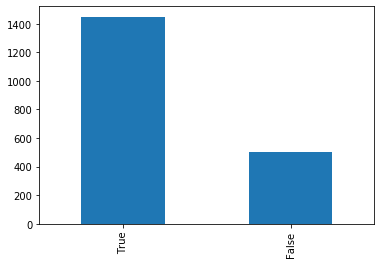

In [178]:
df['p1_dog'].value_counts().plot(kind='bar');

* There are almost 500 images that our algorithm couldn't classify as dogs

### 1. What's the most rated dog tweet 

In [118]:
best_rated = df['rating_numerator'].idxmax()
df.loc[best_rated,]

tweet_id                                             749981277374128128
timestamp                                     2016-07-04 15:00:45+00:00
text                  This is Atticus. He's quite simply America af....
expanded_urls         https://twitter.com/dog_rates/status/749981277...
name                                                            Atticus
dog_stages                                                          NaN
rating_numerator                                                   1776
rating_denominator                                                   10
favorite_count                                                     5285
retweet_count                                                      2554
jpg_url                 https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
img_num                                                               1
p1                                                              bow_tie
p1_conf                                                        0

In [122]:
df.loc[best_rated,]['expanded_urls']

'https://twitter.com/dog_rates/status/749981277374128128/photo/1'

In [123]:
df.loc[best_rated,]['jpg_url']

'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'

<a href = 'https://twitter.com/dog_rates/status/749981277374128128/photo/1'> <img src = 'img\best_rated.jpg' width = 200px></a>

### 2. What's the most favorite dog tweet

In [124]:
most_fav = df['favorite_count'].idxmax()
df.loc[most_fav,]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
name                                                               None
dog_stages                                                        doggo
rating_numerator                                                     13
rating_denominator                                                   10
favorite_count                                                   161329
retweet_count                                                     81106
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                               1
p1                                                   Labrador_retriever
p1_conf                                                        0

In [125]:
df.loc[most_fav,]['expanded_urls']

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

In [126]:
df.loc[most_fav,]['jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

<a href = 'https://twitter.com/dog_rates/status/744234799360020481/video/1'> <img src = 'img\most_fav.jpg' width = '200px' ></a>

### 3. Avg dog breed rating

In [129]:
df['rating_numerator'].median()

11.0

In [5]:
avg_breed_rating = df.groupby(by = ['p1'], as_index=False).agg({'rating_numerator':  'mean', 'tweet_id': 'count'})
avg_breed_rating.rename (columns = {'rating_numerator': 'avg_rating', 'tweet_id': 'num_records'}, inplace=True)
avg_breed_rating.sort_values(by = 'num_records', ascending=False)

,p1,avg_rating,num_records
183,golden_retriever,11.630597,134
44,Labrador_retriever,11.131868,91
58,Pembroke,11.443182,88
22,Chihuahua,10.692308,78
281,pug,10.240741,54
137,chow,11.609756,41
64,Samoyed,11.700000,40
59,Pomeranian,11.151316,38
344,toy_poodle,11.054054,37
235,malamute,10.896552,29


In [6]:
avg_breed_rating10 = avg_breed_rating.sort_values(by = 'num_records', ascending=False).head(10)
avg_breed_rating10

,p1,avg_rating,num_records
183,golden_retriever,11.630597,134
44,Labrador_retriever,11.131868,91
58,Pembroke,11.443182,88
22,Chihuahua,10.692308,78
281,pug,10.240741,54
137,chow,11.609756,41
64,Samoyed,11.700000,40
59,Pomeranian,11.151316,38
344,toy_poodle,11.054054,37
235,malamute,10.896552,29


In [166]:
avg_breed_rating10['diff'] = avg_breed_rating10['avg_rating'] - 11.0
avg_breed_rating10

,p1,avg_rating,num_records,diff
183,golden_retriever,11.630597,134,0.630597
44,Labrador_retriever,11.131868,91,0.131868
58,Pembroke,11.443182,88,0.443182
22,Chihuahua,10.692308,78,-0.307692
281,pug,10.240741,54,-0.759259
137,chow,11.609756,41,0.609756
64,Samoyed,11.700000,40,0.700000
59,Pomeranian,11.151316,38,0.151316
344,toy_poodle,11.054054,37,0.054054
235,malamute,10.896552,29,-0.103448


In [8]:
base_color = sns.color_palette()[0]

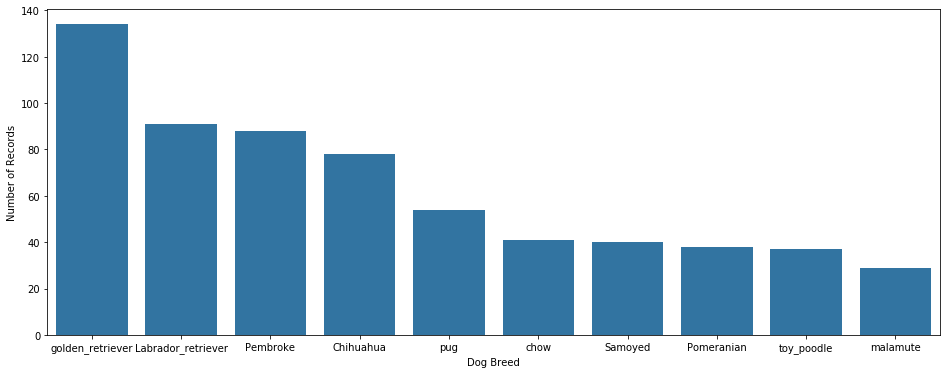

In [10]:
plt.figure(figsize = (16, 6))
sns.barplot(data = avg_breed_rating10, x = 'p1', y='num_records', color=base_color);
plt.xlabel('Dog Breed')
plt.ylabel('Number of Records')
plt.show()

### 4. What are some of the funny CNN predictions

In [13]:
df[df['p1_dog'] ==False]

,tweet_id,timestamp,text,expanded_urls,name,dog_stages,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13.0,10.0,37357.0,8034.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13.0,10.0,40652.0,8186.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False
21,887517139158093824,2017-07-19 03:39:09+00:00,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,such,NaN,14.0,10.0,44710.0,11121.0,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1.0,limousine,0.130432,False
27,886680336477933568,2017-07-16 20:14:00+00:00,This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,Derek,NaN,13.0,10.0,21655.0,4225.0,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1.0,convertible,0.738995,False
48,882045870035918850,2017-07-04 01:18:17+00:00,"This is Koko. Her owner, inspired by Barney, r...",https://twitter.com/dog_rates/status/882045870...,Koko,NaN,13.0,10.0,28305.0,4662.0,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1.0,web_site,0.949591,False
52,881268444196462592,2017-07-01 21:49:04+00:00,Meet Elliot. He's a Canadian Forrest Pup. Unus...,https://twitter.com/dog_rates/status/881268444...,Elliot,NaN,12.0,10.0,22366.0,4960.0,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1.0,tusker,0.473303,False
53,880935762899988482,2017-06-30 23:47:07+00:00,This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,Louis,NaN,13.0,10.0,16470.0,2654.0,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1.0,street_sign,0.251801,False
61,879376492567855104,2017-06-26 16:31:08+00:00,This is Jack AKA Stephen Furry. You're not sco...,https://twitter.com/dog_rates/status/879376492...,Jack,NaN,12.0,10.0,16247.0,2962.0,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1.0,tricycle,0.663601,False
62,879050749262655488,2017-06-25 18:56:45+00:00,This is Steven. He has trouble relating to oth...,https://twitter.com/dog_rates/status/879050749...,Steven,NaN,11.0,10.0,21775.0,4465.0,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,1.0,tabby,0.311861,False
91,872122724285648897,2017-06-06 16:07:15+00:00,This is Kody. He's a baller. Wishes he was a l...,https://twitter.com/dog_rates/status/872122724...,Kody,NaN,12.0,10.0,33394.0,7812.0,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1.0,basketball,0.808396,False


https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg  :Basketball

https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg : Puzzle

https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg : Seatbelt

In [ ]:
fav breed
most popular breed

best rated dog
worst rated dog

top 10 liked data breed